In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import tensorflow as tf

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [7]:
df=pd.read_csv('diabetes.csv')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.shape

(768, 9)

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
X=df.drop("Outcome",axis=1)
Y=df['Outcome']

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [17]:
ss=StandardScaler()

In [18]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [19]:
X.shape

(768, 8)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2,activation="relu",input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(3,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='sgd',loss="binary_crossentropy")

In [23]:
train_model=model.fit(X_train_ss,Y_train,epochs=50,batch_size=20)

Epoch 1/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6986
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6910
Epoch 3/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6847
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6790
Epoch 5/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6742
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6701
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6665
Epoch 8/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6634
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6607
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6583
Epoch 11/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6563
Epoch 12/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6545
Epoch 13/50
27/27 [==============================

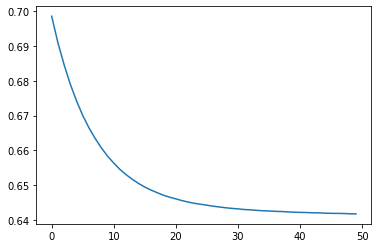

In [24]:
plt.plot(train_model.history['loss'])

In [25]:
Y_pred=model.predict(X_test_ss)

In [26]:
Y_pred=np.where(Y_pred >= 0.5,1,0)

In [27]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       146
           1       0.00      0.00      0.00        85

    accuracy                           0.63       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.40      0.63      0.49       231

